# **Modules imports**

In [1]:
import numpy as np

import keras
from keras import layers

import matplotlib.pyplot as plt

# **Question 4**

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Concatenate the labels from train and test sets
y_combined = np.concatenate([y_train, y_test], axis=0)

# Calculate the count of each class
unique_labels, counts = np.unique(y_combined, return_counts=True)

# Find the most frequent class
most_abundant_class = unique_labels[np.argmax(counts)]

print("Most abundant class:", most_abundant_class)
print("Counts per class:", dict(zip(unique_labels, counts)))

Most abundant class: 1
Counts per class: {0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


# **Question 5**

In [54]:
def create_balanced_kfolds(X, y, k=5):
    """
    Split data into k folds while maintaining class balance across folds.

    Parameters:
        X: Features array
        y: Labels array
        k: Number of folds

    Returns:
        List of (train_indices, val_indices) tuples for each fold
    """
    # Get unique classes
    classes = np.unique(y)
    # Initialize folds with empty lists
    folds = [[] for _ in range(k)]

    # For each class, distribute examples evenly across folds
    for cls in classes:
        # Find indices for samples of this class
        cls_indices = np.argwhere(y == cls).flatten()

        # Shuffle the indices to ensure randomness
        np.random.shuffle(cls_indices)

        # Split indices into k roughly equal parts
        fold_size = len(cls_indices) // k
        remainder = len(cls_indices) % k

        # Distribute indices across folds
        start_idx = 0
        for fold_idx in range(k):
            # Add one extra element to some folds if division isn't even
            extra = 1 if fold_idx < remainder else 0
            end_idx = start_idx + fold_size + extra

            # Add these indices to the current fold
            folds[fold_idx].extend(cls_indices[start_idx:end_idx])
            start_idx = end_idx

    # Convert lists to numpy arrays and create train/val splits
    result = []
    for fold_idx in range(k):
        val_indices = np.array(folds[fold_idx])
        train_indices = np.concatenate([folds[i] for i in range(k) if i != fold_idx])
        result.append((train_indices, val_indices))

    return result

# Example usage:
# folds = create_balanced_kfolds(X_train, y_train, k=5)
# for i, (train_idx, val_idx) in enumerate(folds):
#     X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
#     X_val_fold, y_val_fold = X_train[val_idx], y_train[val_idx]
#     # Train model on this fold...

# **Question 6**

In [15]:
input_shape = (28, 28)

model = keras.Sequential([

    # Input layer with shape equal to a single MNIST example
    layers.Input(shape=input_shape),

    # Flatten layer to convert 2D input to 1D
    layers.Flatten(),

    # Dense layer with 10 neurons and tanh activation
    layers.Dense(10, activation='tanh'),

    # Dense layer with 10 neurons and softmax activation
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

# **Question 7**

In [20]:
# Prepare data for NN training
num_classes = len(unique_labels)

# Scale input pixels to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4461 - loss: 1.8746 - val_accuracy: 0.7432 - val_loss: 1.1863
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7335 - loss: 1.1429 - val_accuracy: 0.8165 - val_loss: 0.8744
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8057 - loss: 0.8838 - val_accuracy: 0.8600 - val_loss: 0.7024
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8408 - loss: 0.7365 - val_accuracy: 0.8822 - val_loss: 0.5967
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8549 - loss: 0.6445 - val_accuracy: 0.8920 - val_loss: 0.5261
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8643 - loss: 0.5836 - val_accuracy: 0.9012 - val_loss: 0.4769
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.5395 - val_accuracy: 0.9053 - val_loss: 0.4410
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8742 - loss: 0.5034 - val_accu

In [35]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.2863
Test loss: 0.2556
Test accuracy: 0.9259


In [31]:
# Get final training and validation metrics
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal training loss: {final_train_loss:.4f}")
print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Final validation loss: {final_val_loss:.4f}")
print(f"Final validation accuracy: {final_val_acc:.4f}")


Final training loss: 0.2414
Final training accuracy: 0.9314
Final validation loss: 0.2129
Final validation accuracy: 0.9395


In [37]:
# Compare test metrics with train and validation metrics
print("\nComparison:")
print(f"Test loss vs. Training loss: {'Higher' if loss > final_train_loss else 'Lower'}")
print(f"Test loss vs. Validation loss: {'Higher' if loss > final_val_loss else 'Lower'}")
print(f"Test accuracy vs. Training accuracy: {'Higher' if accuracy > final_train_acc else 'Lower'}")
print(f"Test accuracy vs. Validation accuracy: {'Higher' if accuracy > final_val_acc else 'Lower'}")


Comparison:
Test loss vs. Training loss: Higher
Test loss vs. Validation loss: Higher
Test accuracy vs. Training accuracy: Lower
Test accuracy vs. Validation accuracy: Lower


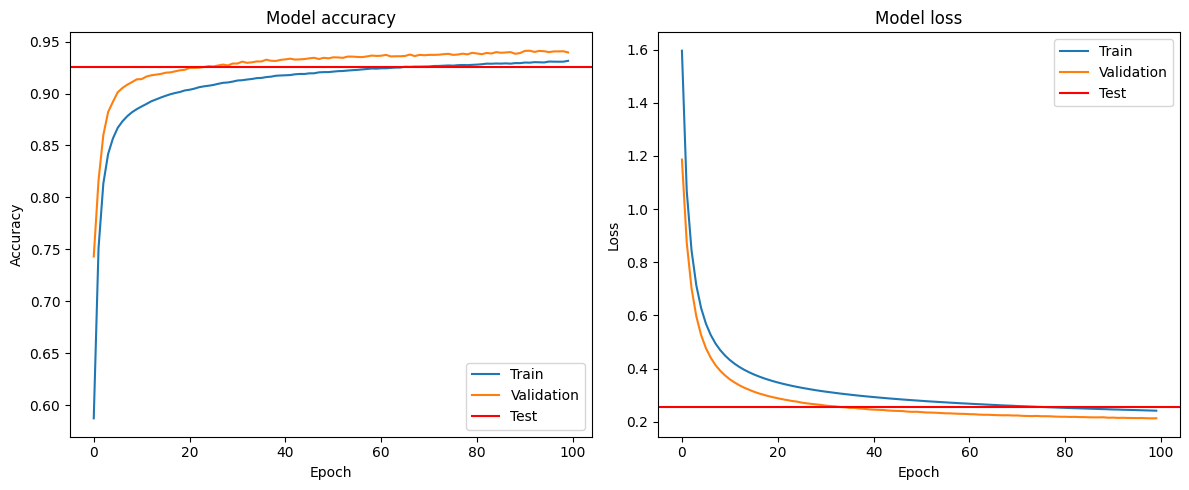

In [39]:
# Plot training & validation metrics
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axhline(y=accuracy, color='r', linestyle='-', label='Test accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axhline(y=loss, color='r', linestyle='-', label='Test loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

# **Question 8**

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
# Get predicted probabilities for the test set
y_pred_probs = model.predict(x_test)

# Get predicted classes by selecting the class with highest probability
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get true classes from one-hot encoded labels
y_true_classes = np.argmax(y_test, axis=1)

# Calculate overall accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Overall accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Overall accuracy: 0.9259


In [43]:
# Focus on class 2
class_of_interest = 2

# Create binary labels for class 2 (1 if class 2, 0 otherwise)
y_true_binary = (y_true_classes == class_of_interest).astype(int)
y_pred_binary = (y_pred_classes == class_of_interest).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Matthew's Correlation Coefficient (MCC)
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

print("Confusion Matrix for Class 2:")
print(conf_matrix)
print(f"Matthew's Correlation Coefficient (MCC): {mcc:.4f}")

Confusion Matrix for Class 2:
[[8879   89]
 [  78  954]]
Matthew's Correlation Coefficient (MCC): 0.9102


In [44]:
print(f"\nComparison between MCC ({mcc:.4f}) and ACC ({accuracy:.4f}):")
if mcc > accuracy:
    print("MCC is higher than ACC")
else:
    print("MCC is lower than ACC")


Comparison between MCC (0.9102) and ACC (0.9259):
MCC is lower than ACC


In [ ]:
# 1 refers to positive for Class 2, 0 for negative
unique_classes, class_counts = np.unique(y_true_binary, return_counts=True)
print("\nClass distribution in test set:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples ({count/len(y_test)*100:.2f}%)")


Class distribution in test set:
Class 0: 8968 samples (89.68%)
Class 1: 1032 samples (10.32%)


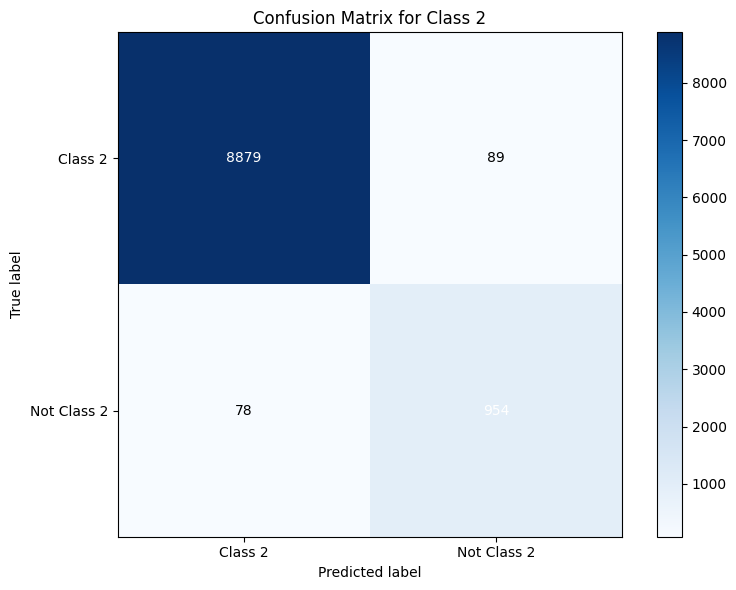

In [ ]:
# Visualize confusion matrix for class 2
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Class 2')
plt.colorbar()
plt.xticks([0, 1], ['Class 2', 'Not Class 2'])
plt.yticks([0, 1], ['Class 2', 'Not Class 2'])

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add text annotations
for i in range(2):
    for j in range(2):
        text = plt.text(j, i, conf_matrix[i][j],
                       ha="center", va="center", color="white" if i == j else "black")

plt.tight_layout()
plt.show()

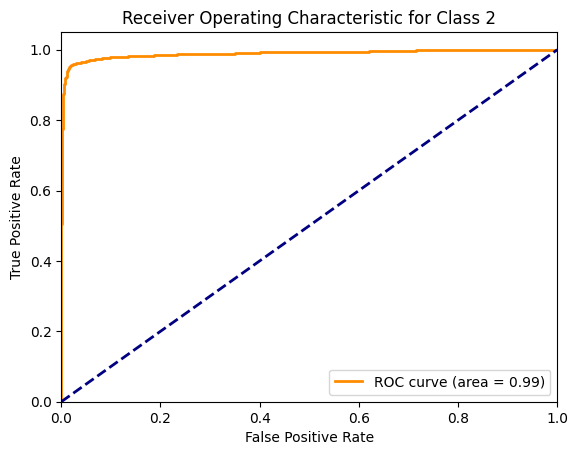

In [51]:
from sklearn.metrics import roc_curve, auc

# Focus on class 2
class_of_interest = 2

# Get predicted probabilities for class 2
y_pred_probs_class2 = y_pred_probs[:, class_of_interest]

# Create binary labels for class 2 (1 if class 2, 0 otherwise)
y_true_binary = (y_true_classes == class_of_interest).astype(int)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_probs_class2)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Class 2')
plt.legend(loc="lower right")
plt.show()


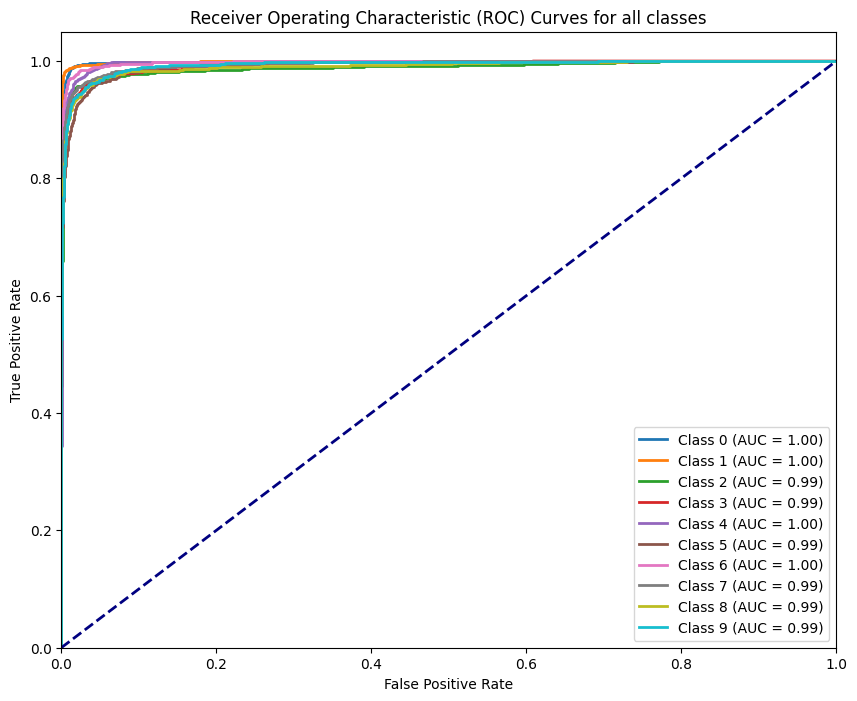

In [52]:
# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))

for class_of_interest in range(10):  # Assuming 10 classes (MNIST)
    # Get predicted probabilities for the current class
    y_pred_probs_class = y_pred_probs[:, class_of_interest]

    # Create binary labels for the current class
    y_true_binary = (y_true_classes == class_of_interest).astype(int)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_probs_class)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_of_interest} (AUC = {roc_auc:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for all classes')
plt.legend(loc="lower right")
plt.show()
